In [1]:
# Run this cell to set up packages for lecture.
from lec06_imports import *

# Lecture 6, Part 2: Grouping on Multiple Columns, Merging

## DSC 10, Summer 2025

### Agenda

- Grouping on multiple columns.
- Merging.

## Grouping on multiple columns

### DSC 10 student data

In [2]:
roster = bpd.read_csv('data/roster-anon.csv')
roster

,name,section
0,Cindy Ubobpd,9AM
1,Madeleine Omidge,11AM
2,Caleb Ryincn,11AM
...,...,...
137,Chloe Camvgc,11AM
138,Sophie Ilvrib,11AM
139,Lani Rpcmgt,11AM


In [3]:
def first_name(full_name):
    '''Returns the first name given a full name.'''
    return full_name.split(' ')[0]

In [4]:
roster = roster.assign(
    first=roster.get('name').apply(first_name)
)
roster

,name,section,first
0,Cindy Ubobpd,9AM,Cindy
1,Madeleine Omidge,11AM,Madeleine
2,Caleb Ryincn,11AM,Caleb
...,...,...,...
137,Chloe Camvgc,11AM,Chloe
138,Sophie Ilvrib,11AM,Sophie
139,Lani Rpcmgt,11AM,Lani


### How many students named Diego are in each section?

In [5]:
name_counts = (
    roster
    .groupby('first')
    .count()
    .sort_values('name', ascending=False)
    .get(['name'])
)
name_counts

,name
first,
Abraham,2
Diego,2
Audrey,2
...,...
Diya,1
Dante,1
Zirong,1


To find the number of `'Diego'`s in each lecture section, we can query for only the rows corresponding to `'Diego'`s, and then group by `'section'`.

In [6]:
roster[roster.get('first') == 'Diego'].groupby('section').count()

,name,first
section,,
11AM,1,1
9AM,1,1


But what if we want to know the number of `'Alex'`s and `'Lucy'`s per section, too?

In [7]:
roster[roster.get('first') == 'Alex'].groupby('section').count()

,name,first
section,,
9AM,2,2


In [8]:
roster[roster.get('first') == 'Lucy'].groupby('section').count()

,name,first
section,,
11AM,1,1


Is there a way to do this **for all first names and sections** all at once?

### How many students with each first name does each lecture section have?

- Right now, we can count the number of students with each first name, by grouping `roster` by `'first'`.

In [9]:
# One row per unique first name.
roster.groupby('first').count().get(['name'])

,name
first,
Aaron,1
Aaryaman,1
Abraham,2
...,...
Yuwen,1
Yuzhe,1
Zirong,1


- We can also count the number of students in each lecture section, by grouping `roster` by `'section'`.

In [10]:
# One row per unique section.
roster.groupby('section').count().get(['name'])

,name
section,
11AM,75
9AM,65


- However, neither of the above DataFrames give us the number of students **with each first name** **in each section**.
    - For instance, neither result tells me the number of `'Alex'`s in the 9AM section or the number of `'Lucy'`s in the 11AM section.

- It would be nice if we could group by both `'first'` **and** `'section'` – and we can!

### Grouping on multiple columns

In [11]:
roster

,name,section,first
0,Cindy Ubobpd,9AM,Cindy
1,Madeleine Omidge,11AM,Madeleine
2,Caleb Ryincn,11AM,Caleb
...,...,...,...
137,Chloe Camvgc,11AM,Chloe
138,Sophie Ilvrib,11AM,Sophie
139,Lani Rpcmgt,11AM,Lani


We can pass a **list** of column names to `.groupby`!

In [12]:
roster.groupby(['section', 'first']).count()

name
section first        
11AM    Aaron       1
        Abraham     1
        Adreya      1
...               ...
9AM     Weixuan     1
        Yashas      1
        Yuwen       1

[138 rows x 1 columns]

The above DataFrame is telling us, for instance, that there is 1 student with the first name `'Yuwen'` in the 9AM section.

It is **not** saying that there is only one `'Yuwen'` in the course overall. There could be more in the other sections.

### Grouping on multiple columns

- To group on multiple columns, pass a **list** of column names to `.groupby`:

<br>

<center><code>df.groupby(['col_1', 'col_2', ..., 'col_k'])</code></center>


- Group by `'col_1'` first. **Within each group**, group by `'col_2'`, and so on.

- **Important: The resulting DataFrame has one row per unique combination of entries in the specified columns.**
    - On the previous slide, we had exactly one row for every combination of `'section'` and `'first'`.

- Formally, when we group on multiple columns, we are creating _subgroups_ – that is, **groups within groups**.
    - On the previous slide, we first grouped by `'section'`, and within each section, we grouped by `'first'`.

### Notice the index... 🤔

- This is called a "[MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)".
    - The DataFrame is indexed by `'section'` **and** `'first'`.
- We won't worry about the details of MultiIndexes.
- We can use `.reset_index()` to "flatten" our DataFrame back to normal.

In [16]:
roster.groupby(['first', 'section']).count()

,,name
first,section,
Aaron,11AM,1
Aaryaman,9AM,1
Abraham,11AM,1
...,...,...
Yuwen,9AM,1
Yuzhe,11AM,1
Zirong,11AM,1


In [13]:
roster.groupby(['section', 'first']).count().reset_index()

,section,first,name
0,11AM,Aaron,1
1,11AM,Abraham,1
2,11AM,Adreya,1
...,...,...,...
135,9AM,Weixuan,1
136,9AM,Yashas,1
137,9AM,Yuwen,1


### Does order matter?

In [17]:
roster.groupby(['section', 'first']).count().reset_index()

,section,first,name
0,11AM,Aaron,1
1,11AM,Abraham,1
2,11AM,Adreya,1
...,...,...,...
135,9AM,Weixuan,1
136,9AM,Yashas,1
137,9AM,Yuwen,1


In [18]:
roster.groupby(['first', 'section']).count().reset_index()

,first,section,name
0,Aaron,11AM,1
1,Aaryaman,9AM,1
2,Abraham,11AM,1
...,...,...,...
135,Yuwen,9AM,1
136,Yuzhe,11AM,1
137,Zirong,11AM,1


**Answer**: Kind of. The order of the rows and columns will be different, but the content will be the same.

### Activity

1. Using `counts`, find the lecture section with the most `'Audrey'`s.
2. Using `counts`, find the longest first name in the class that is shared by at least two students in the same section.

<details>
<summary>✅ Click <b>here</b> to see the solutions <b>after</b> you've tried both problems.</summary>
    
<pre>

audrey_counts = counts[counts.get('first') == 'Audrey']
audrey_counts.sort_values('name', ascending=False).get('section').iloc[0]

with_len = counts.assign(length=counts.get('first').apply(len))
with_len[with_len.get('name') >= 2].sort_values('length', ascending=False).get('first').iloc[0]

</pre>
        
</details>

In [19]:
counts = roster.groupby(['section', 'first']).count().reset_index()
counts

,section,first,name
0,11AM,Aaron,1
1,11AM,Abraham,1
2,11AM,Adreya,1
...,...,...,...
135,9AM,Weixuan,1
136,9AM,Yashas,1
137,9AM,Yuwen,1


In [23]:
audrey_counts = counts[counts.get('first') == 'Diego']
audrey_counts.sort_values('name', ascending=False)

,section,first,name
22,11AM,Diego,1
92,9AM,Diego,1


In [28]:
counts_w_len = counts.assign(length=counts.get('first').apply(len))
counts_w_len[counts_w_len.get('name') >=2]

,section,first,name,length
10,11AM,Audrey,2,6
78,9AM,Alex,2,4


### Example: Sea temperatures 🌊

[This dataset](https://library.ucsd.edu/dc/object/bb4003017c) contains the sea surface temperature in La Jolla, on many days ranging from August 22, 1916 to June 30, 2024.

In [29]:
sea_temp = bpd.read_csv('data/sea_temp.csv')
sea_temp

,YEAR,MONTH,DAY,SURFACE_TEMP
0,1916,8,22,19.5
1,1916,8,23,19.9
2,1916,8,24,19.7
...,...,...,...,...
38088,2024,6,27,21.3
38089,2024,6,28,20.8
38090,2024,6,30,21.5


### Concept Check ✅ 

We want to find the single month (e.g. November 1998) with the highest average `'SURFACE_TEMP'`.

Which of the following would help us achieve this goal?

A. `sea_temp.groupby('SURFACE_TEMP').mean()`

B. `sea_temp.groupby('MONTH').mean()`

C. `sea_temp.groupby(['YEAR', 'MONTH']).mean()`

D. `sea_temp.groupby(['MONTH', 'DAY']).mean()`

E. `sea_temp.groupby(['MONTH', 'SURFACE_TEMP']).mean()`

In [33]:
sea_temp.groupby(['YEAR', 'MONTH']).mean().reset_index().sort_values('SURFACE_TEMP')

,YEAR,MONTH,DAY,SURFACE_TEMP
5,1917,1,17.20,11.83
270,1939,2,14.50,11.96
389,1949,1,16.00,12.28
...,...,...,...,...
179,1931,7,16.00,23.65
1189,2015,9,15.45,24.09
1224,2018,8,15.90,24.73


### Plots of monthly and yearly average surface temperature 📈

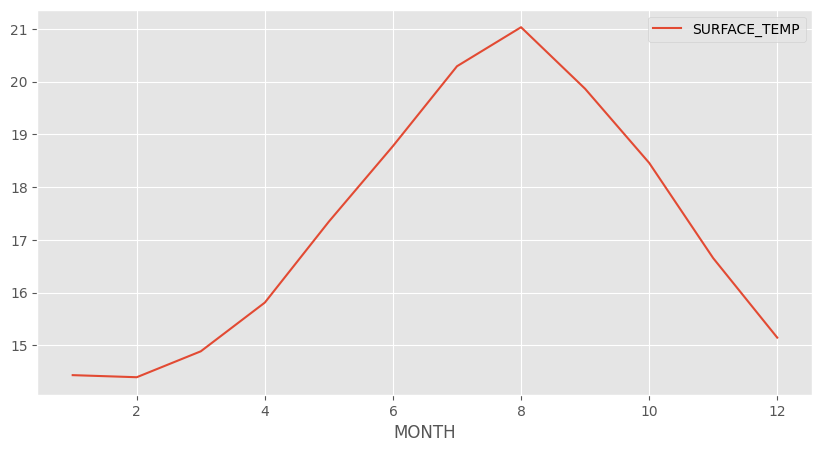

In [34]:
(sea_temp
 .groupby('MONTH') 
 .mean() 
 .plot(kind='line', y='SURFACE_TEMP')
);

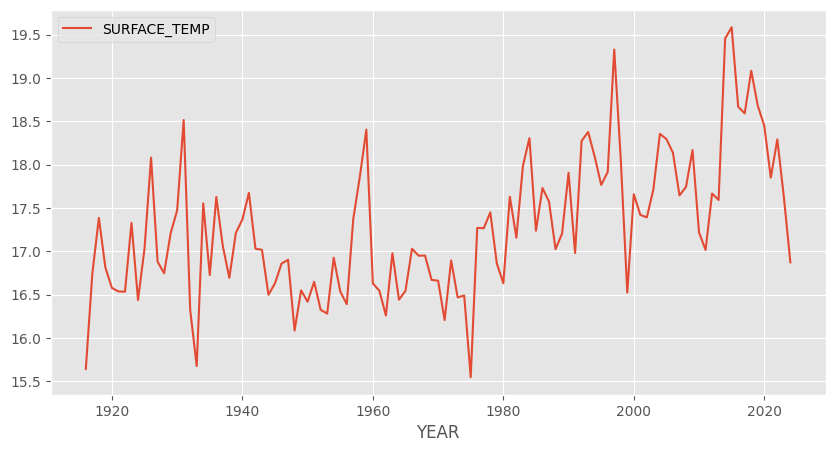

In [35]:
# Why is there a sudden drop at the end? Look at the dates of data collection!
(sea_temp
 .groupby('YEAR') 
 .mean() 
 .plot(kind='line', y='SURFACE_TEMP')
);

### Summary: Grouping on multiple columns

- Pass a list of columns to `.groupby` to group on multiple columns. This creates groups within groups.
- Use `.reset_index()` after grouping on multiple columns to move the MultiIndex back to the columns.

## Merging 🚙

In [36]:
offer_percentage = bpd.DataFrame().assign(
    clothing_type=['Shirt', 'Pants', 'Dress', 'Shorts', 'Shoes'],
    offer_percentage=[20, 30, 50, 30, 50]
)

clothes = bpd.DataFrame().assign(
    item=['Dress', 'Shirt', 'Shoes', 'Pants', 'Shoes'],
    retail_price=[150, 30, 90, 50, 70]
)

### Example: Clothing Resale 👕

In [37]:
# The percentage of retail price that I can earn for reselling my clothes.
offer_percentage

,clothing_type,offer_percentage
0,Shirt,20
1,Pants,30
2,Dress,50
3,Shorts,30
4,Shoes,50


In [38]:
# The items I want to sell and their retail prices.
clothes

,item,retail_price
0,Dress,150
1,Shirt,30
2,Shoes,90
3,Pants,50
4,Shoes,70


- **Question**: If I sell all of the clothes in my collection, how much will I earn?

- **Issue**: The information I need to answer the question is spread across multiple DataFrames.

### If I sell all of the clothes in my collection, how much will I earn?

In [39]:
clothes_merged = offer_percentage.merge(clothes, left_on='clothing_type', right_on='item')
clothes_merged

,clothing_type,offer_percentage,item,retail_price
0,Shirt,20,Shirt,30
1,Pants,30,Pants,50
2,Dress,50,Dress,150
3,Shoes,50,Shoes,90
4,Shoes,50,Shoes,70


### What just happened!? 🤯

In [40]:
# Click through the presentation that appears.
merging_animation()

### `.merge`

To "merge" two DataFrames:
- Pick a "left" and "right" DataFrame.
- Choose a column from each to "merge on".
```py
left_df.merge(
    right_df, 
    left_on='left_col_name',
    right_on='right_col_name'
)
```
- `left_on` and `right_on` should be column names (they don't have to be the same).
- The resulting DataFrame contains a single row for every match between the two columns.
- Rows in either DataFrame without a match disappear!

### If I sell all of the clothes in my collection, how much will I earn?

In [41]:
clothes_merged = offer_percentage.merge(clothes, left_on='clothing_type', right_on='item')
clothes_merged

,clothing_type,offer_percentage,item,retail_price
0,Shirt,20,Shirt,30
1,Pants,30,Pants,50
2,Dress,50,Dress,150
3,Shoes,50,Shoes,90
4,Shoes,50,Shoes,70


In [42]:
# If I sell all of the clothes in my collection, how much will I earn?
(clothes_merged.get('offer_percentage') / 100 * clothes_merged.get('retail_price')).sum() 

176.0

### Does it matter which DataFrame is the left or right DataFrame? 🤔

In [43]:
offer_percentage.merge(clothes, left_on='clothing_type', right_on='item')

,clothing_type,offer_percentage,item,retail_price
0,Shirt,20,Shirt,30
1,Pants,30,Pants,50
2,Dress,50,Dress,150
3,Shoes,50,Shoes,90
4,Shoes,50,Shoes,70


In [44]:
clothes.merge(offer_percentage, left_on='item', right_on='clothing_type')

,item,retail_price,clothing_type,offer_percentage
0,Dress,150,Dress,50
1,Shirt,30,Shirt,20
2,Shoes,90,Shoes,50
3,Shoes,70,Shoes,50
4,Pants,50,Pants,30


**Answer**: The order of the rows and columns will be different, but the content will be the same.

### Special cases

#### What if the names of the columns we want to merge on are both the same?

Instead of using `left_on='col'` and `right_on='col'`, you can just say `on='col'`.

In [45]:
offer_percentage

,clothing_type,offer_percentage
0,Shirt,20
1,Pants,30
2,Dress,50
3,Shorts,30
4,Shoes,50


In [46]:
clothes_relabeled = clothes.assign(clothing_type=clothes.get('item')).drop(columns=['item'])
clothes_relabeled

,retail_price,clothing_type
0,150,Dress
1,30,Shirt
2,90,Shoes
3,50,Pants
4,70,Shoes


In this example, the column we want to merge on in both DataFrames is named `'clothing_type'`, so we can just use `on='clothing_type'`.

In [47]:
offer_percentage.merge(clothes_relabeled, on='clothing_type')

,clothing_type,offer_percentage,retail_price
0,Shirt,20,30
1,Pants,30,50
2,Dress,50,150
3,Shoes,50,90
4,Shoes,50,70


**Notice**: There's only one column containing the type of clothing now.

#### What if we want to merge using an index instead of a column?

Instead of using `left_on` or `right_on`, use `left_index=True` or `right_index=True`.

In [48]:
offers_by_item = offer_percentage.set_index('clothing_type')
offers_by_item

,offer_percentage
clothing_type,
Shirt,20
Pants,30
Dress,50
Shorts,30
Shoes,50


In [49]:
clothes

,item,retail_price
0,Dress,150
1,Shirt,30
2,Shoes,90
3,Pants,50
4,Shoes,70


In this example, we want to merge using the index in the left DataFrame (`offers_by_item`) and the `item` column in the right DataFrame (`clothes`).

In [50]:
offers_by_item.merge(clothes, left_index=True, right_on='item')

,offer_percentage,item,retail_price
1,20,Shirt,30
3,30,Pants,50
0,50,Dress,150
2,50,Shoes,90
4,50,Shoes,70


### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

How many rows are in `weather.merge(schools, on='city')`?

    A. 4    B. 5    C. 6    D. 7    E. 8

In [ ]:
concept_check()

### Followup activity

How many rows are in `weather.merge(schools, on='state')`?

### More practice!

Here are related exam problems to help you practice merging:
- [Problem 5 from the Fall 2021 midterm](https://practice.dsc10.com/fa21-midterm/index.html#problem-5).
- [Problem 7 from the Fall 2022 midterm](https://practice.dsc10.com/fa22-midterm/index.html#problem-7).

## Summary, next time

### Summary

- To group on multiple columns, pass a list to `.groupby`.
    - The result has one row for every unique combination of elements in the specified columns.
- To combine information from multiple DataFrames, use `.merge`.
    - When using `.merge`, Python searches for a match between a specified column in each DataFrame and combines the rows with a match.
    - If there are no matches, the row disappears!

### Next time

- **`if`-statements**, to execute code only when certain conditions are met.
- **`for`-loops**, to repeat code many times.
- Both are foundational programming tools. 🛠